# Analyse des donnees de vol de Syride

- [Les Ruinettes (CH)](https://www.syride.com/fr/vols/&pseudo=0&typePratique=0&idSpot=1383&order=dateLastSession&tri=DESC)
- [Planfait (FR)](https://www.syride.com/fr/vols/&pseudo=0&typePratique=0&idSpot=490&order=dateLastSession&tri=DESC)

In [210]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Matplotlib params
plt.rcParams['figure.dpi']= 100
plt.rc('axes', axisbelow=True)
plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')

In [211]:
# Import Ruinettes and Planfait data
columns = ['distance', 'plafond', 'duration', 'date']
df1 = pd.read_csv('ruinettes.csv', index_col=0)
df2 = pd.read_csv('planfait.csv', index_col=0)

df1.columns = columns
df2.columns = columns

In [212]:
print('Ruinettes')
df1.head(2)

Ruinettes


,distance,plafond,duration,date
0,4\nKilometers,2183\nmeters,00:08:04s,14/01/2022\n15h 16h
1,15\nKilometers,2367\nmeters,01:23:01s,14/01/2022\n14h 15h


In [213]:
print('Planfait')
df2.head(2)

Planfait


,distance,plafond,duration,date
0,3,1045,0 days 00:37:28.000000000,2022-01-17
1,2,950,0 days 00:19:48.000000000,2022-01-17


## Data cleaning

In [214]:
import math

def data_clean(df, n):
    if n == 1:
        idx = (df['distance'] == 'Under calculation')
        df = df.loc[~idx]
        df['distance'] = df['distance'].str.rstrip('\nKilometers')
        df['distance'] = pd.to_numeric(df['distance'])
        
        df['plafond'] = df['plafond'].str.rstrip('\nmeters')
        df['plafond'] = pd.to_numeric(df['plafond'])
        
        df['date'] = df['date'].str[:-8]
        df['date']= pd.to_datetime(df['date'])
        
        df['duration'] = pd.to_timedelta(df['duration'])/pd.Timedelta('1m')
        df['duration'] = df['duration'].astype(int)
        
        df['month'] = df['date'].dt.month
        df['week'] = df['date'].dt.isocalendar().week
               
    
    elif n == 2:
        df['distance'] = pd.to_numeric(df['distance'])
        df['plafond'] = pd.to_numeric(df['plafond'])
        
        #df['duration']= pd.to_timedelta(df['duration'])
        df['duration'] = pd.to_timedelta(df['duration'])/pd.Timedelta('1m')
        df['duration'] = df['duration'].astype(int)

        
        df['date']= pd.to_datetime(df['date'])
        df['month'] = df['date'].dt.month
        df['week'] = df['date'].dt.isocalendar().week
    
    return df

In [215]:
df1 = data_clean(df1, 1)

print('Ruinettes shape :', df1.shape)
df1.head()

Ruinettes shape : (3339, 6)


,distance,plafond,duration,date,month,week
0,4,2183,8,2022-01-14,1,2
1,15,2367,83,2022-01-14,1,2
2,4,2180,8,2022-01-14,1,2
3,3,2090,7,2022-01-14,1,2
4,6,2177,18,2022-06-01,6,22


In [216]:
df2 = data_clean(df2, 2)

print('Planfait shape :', df2.shape)
df2.head()

Planfait shape : (5900, 6)


,distance,plafond,duration,date,month,week
0,3,1045,37,2022-01-17,1,3
1,2,950,19,2022-01-17,1,3
2,1,958,6,2022-01-16,1,2
3,1,886,4,2022-01-16,1,2
4,1,905,3,2022-01-15,1,2


# Decribe

In [217]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,3339.0,8.735250,9.846028,0.0,4.0,6.0,10.0,112.0
plafond,3339.0,2381.746331,388.759805,0.0,2162.0,2187.0,2519.0,5006.0
duration,3339.0,38.744235,40.701995,0.0,15.0,23.0,47.0,380.0
month,3339.0,7.141659,3.214426,1.0,4.0,8.0,10.0,12.0
week,3339.0,29.239892,14.021669,1.0,17.0,32.0,41.0,53.0


In [218]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,5900.0,10.533898,14.167634,0.0,2.0,4.0,13.0,131.0
plafond,5900.0,1429.434237,546.730247,554.0,970.0,1161.5,1837.0,3796.0
duration,5900.0,55.096271,56.137109,0.0,12.0,35.0,81.0,394.0
month,5900.0,6.516610,2.928236,1.0,4.0,7.0,9.0,12.0
week,5900.0,26.655254,12.741000,1.0,16.0,29.0,36.0,53.0


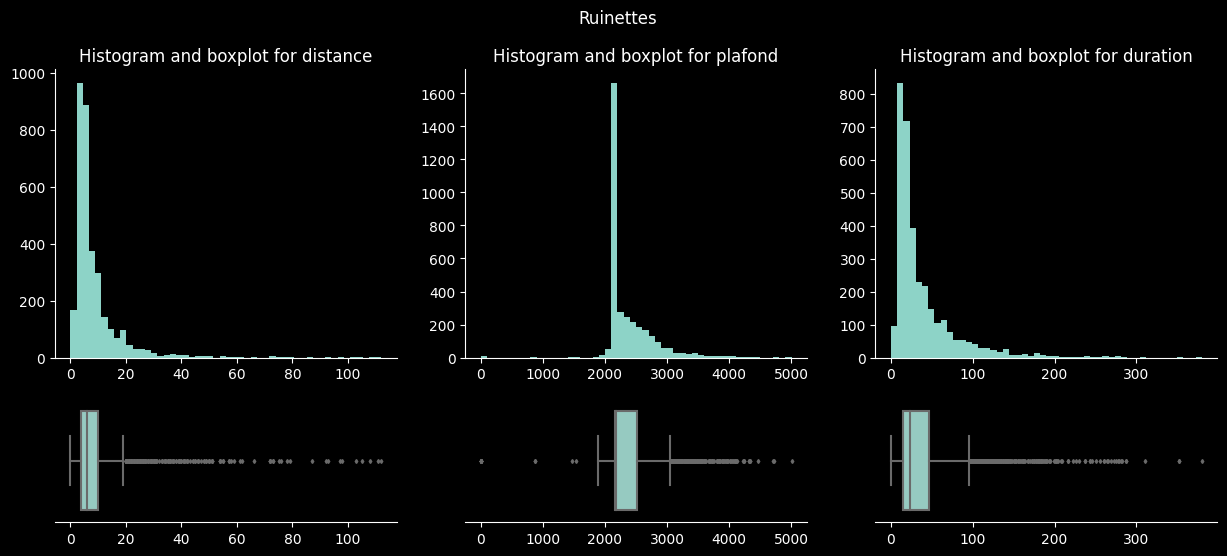

In [219]:
fig, axes = plt.subplots(
    2, 3, gridspec_kw={"height_ratios": (0.7, 0.3)}, figsize=(15, 6)
)

for (feat, plot_col) in zip(
    ["distance", "plafond", "duration"], [0, 1, 2]  # pairing feature with column in plot
):  
    axes[0, plot_col].hist(df1[feat], bins=50)
    axes[0, plot_col].set_title("Histogram and boxplot for {}".format(feat))
    sns.despine(ax=axes[0, plot_col])
    sns.boxplot(df1[feat], ax=axes[1, plot_col], fliersize=2)
    axes[1, plot_col].set(yticks=[])
    sns.despine(ax=axes[1, plot_col], left=True)

for ax in axes.flatten():
    ax.set_xlabel("")
plt.suptitle('Ruinettes')
plt.show()

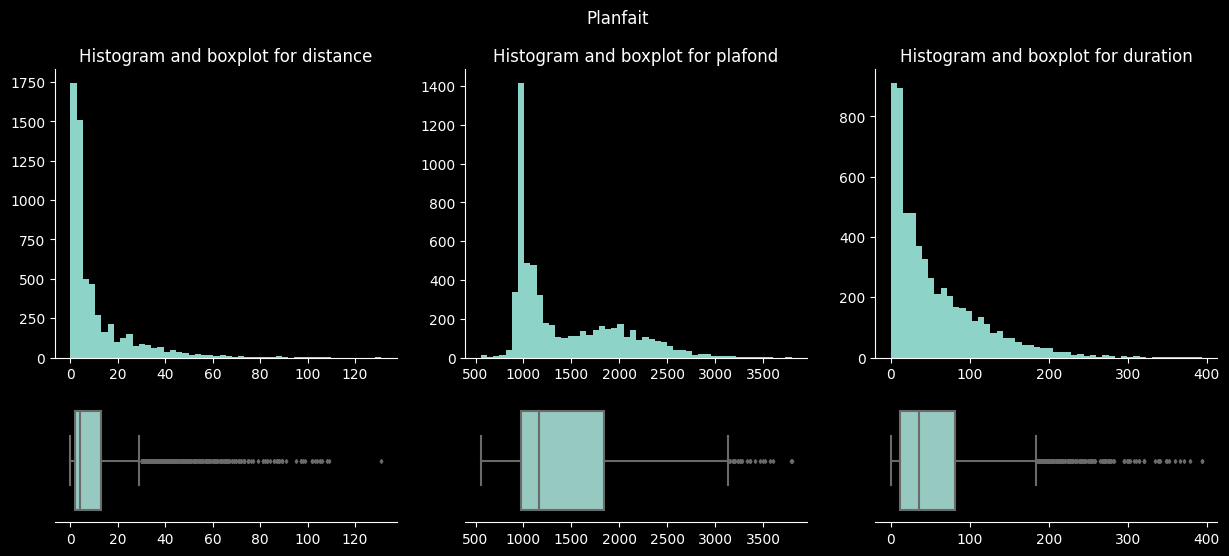

In [220]:
fig, axes = plt.subplots(
    2, 3, gridspec_kw={"height_ratios": (0.7, 0.3)}, figsize=(15, 6)
)

for (feat, plot_col) in zip(
    ["distance", "plafond", "duration"], [0, 1, 2]  # pairing feature with column in plot
):  
    axes[0, plot_col].hist(df2[feat], bins=50)
    axes[0, plot_col].set_title("Histogram and boxplot for {}".format(feat))
    sns.despine(ax=axes[0, plot_col])
    sns.boxplot(df2[feat], ax=axes[1, plot_col], fliersize=2)
    axes[1, plot_col].set(yticks=[])
    sns.despine(ax=axes[1, plot_col], left=True)

for ax in axes.flatten():
    ax.set_xlabel("")
plt.suptitle('Planfait')
plt.show()

## Manual filter

In [221]:
# Remove plafond below take off

idx = (df1['plafond'] < 2120)
print('Removed Ruinettes :', idx.sum())
df1 = df1.loc[~idx]
print(df1.shape)

idx = (df2['plafond'] < 960)
print('Remove Planfait :', idx.sum())
df2 = df2.loc[~idx]
print(df2.shape)

Removed Ruinettes : 112
(3227, 6)
Remove Planfait : 1274
(4626, 6)


In [222]:
# Remove duration below 10min

idx = (df1['duration'] < 10)
print('Removed Ruinettes :', idx.sum())
df1 = df1.loc[~idx]
print(df1.shape)

idx = (df2['duration'] < 10)
print('Remove Planfait :', idx.sum())
df2 = df2.loc[~idx]
print(df2.shape)

Removed Ruinettes : 173
(3054, 6)
Remove Planfait : 228
(4398, 6)


In [223]:
# # Remove outliers
# zfilter_df = np.abs(zscore(df['distance'])) > 6
# #df.iloc[zfilter_df]
# df.drop(zfilter_df, inplace=True)
# df.shape

# Plots

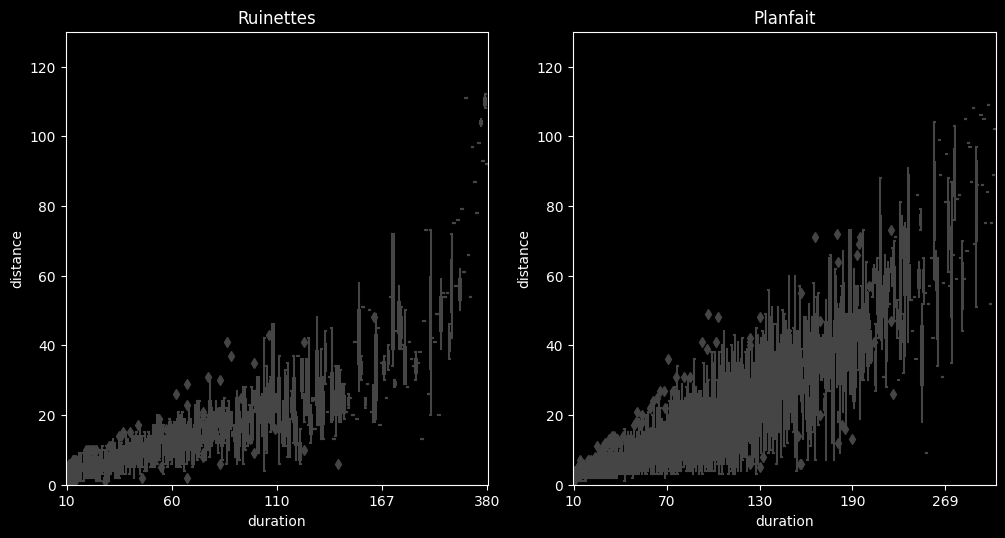

In [231]:
fig, ax = plt.subplots(1,2, figsize=(12, 6))

sns.boxplot(df1['duration'], df1['distance'], ax=ax[0])
ax[0].xaxis.set_major_locator(plt.MaxNLocator(5))
ax[0].set_title('Ruinettes')
ax[0].set_ylim(0, 130)

sns.boxplot(df2['duration'], df2['distance'], ax=ax[1])
ax[1].xaxis.set_major_locator(plt.MaxNLocator(5))
ax[1].set_title('Planfait')
#ax[1].set_xlim(min_x, max_x)
ax[1].set_ylim(0, 130)

plt.show()

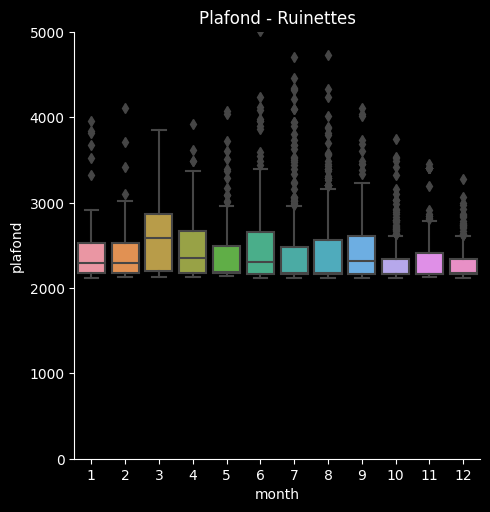

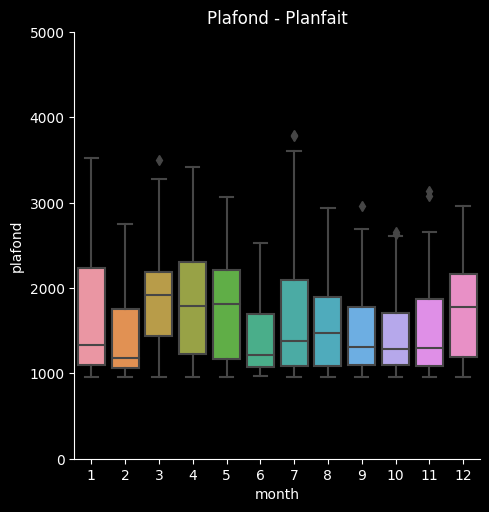

In [313]:
#fig = plt.figure(figsize=(12, 6))

sns.catplot(data=df1, x='month', y='plafond', kind='box')
plt.ylim(0,5000)
plt.title('Plafond - Ruinettes')

sns.catplot(data=df2, x='month', y='plafond', kind='box')
plt.ylim(0,5000)
plt.title('Plafond - Planfait')
plt.show()

Beaucoup d'outliers aux Ruinettes. Des pilotes beaucoup plus fort que la moyenne.

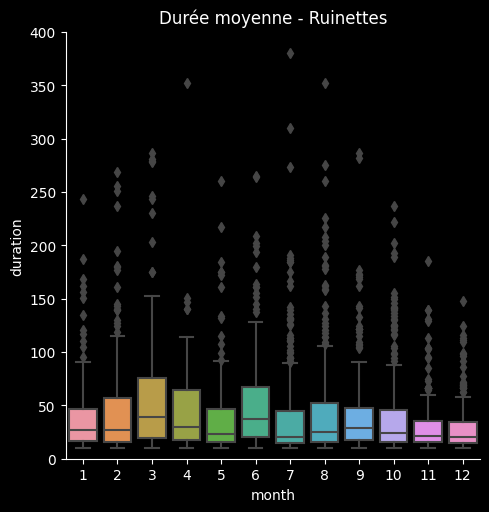

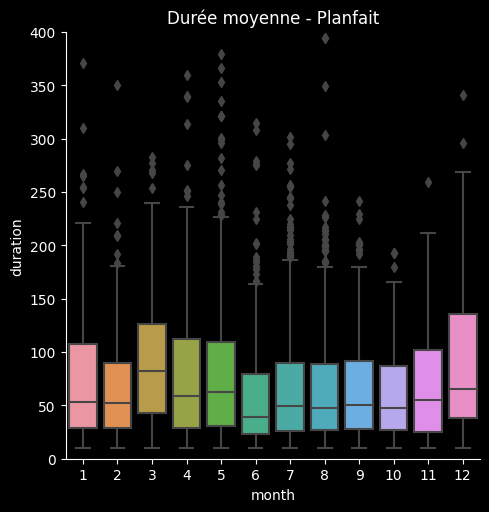

In [312]:
#fig = plt.figure(figsize=(12, 6))

sns.catplot(data=df1, x='month', y='duration', kind='box')
plt.ylim(0,400)
plt.title('Durée moyenne - Ruinettes')

sns.catplot(data=df2, x='month', y='duration', kind='box')
plt.ylim(0,400)
plt.title('Durée moyenne - Planfait')
plt.show()

In [311]:
# dd = df2.pivot_table(index='month', values='duration', aggfunc={'mean', 'count'})
# sns.barplot(dd.index, dd['count'])
# sns.lineplot(dd.index, dd['mean'])
# plt.title('Number of flights per month - Planfait');

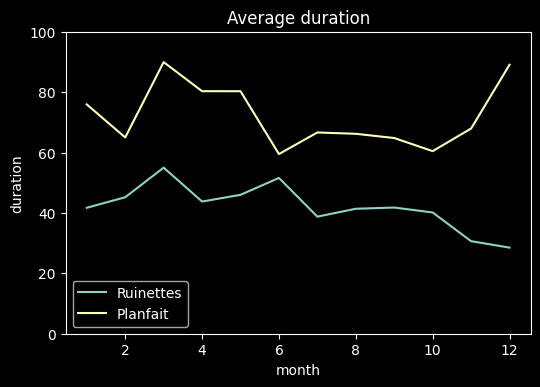

In [291]:
sites = {'Ruinettes': df1, 'Planfait': df2}

for key, df in sites.items():
    #print(key, df)
    df.groupby('month')['duration'].mean().plot(label=key)
    plt.ylim(0,100)
    plt.ylabel('duration')
    plt.legend()
    plt.title('Average duration')

Faux, c'est dû au nombre d'obserations qui sont bien plus elevees en été et du niveau moyen de la moyenne des pilotes.

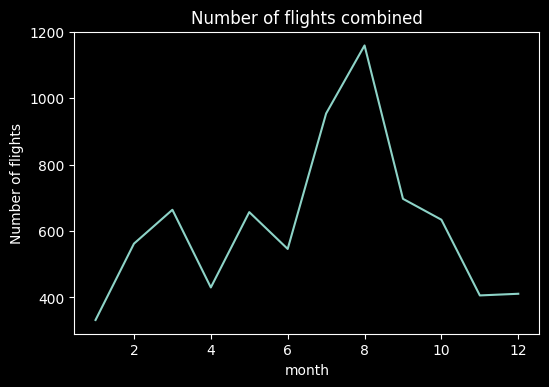

In [310]:
dd = df1.groupby('month')['duration'].count()
ff = df2.groupby('month')['duration'].count()
gg = dd + ff
gg.plot()
plt.title('Number of flights combined')
plt.ylabel('Number of flights')
plt.show()

Mieux vaut prendre le percentile 75 pour voir le temps des meilleurs pilotes.

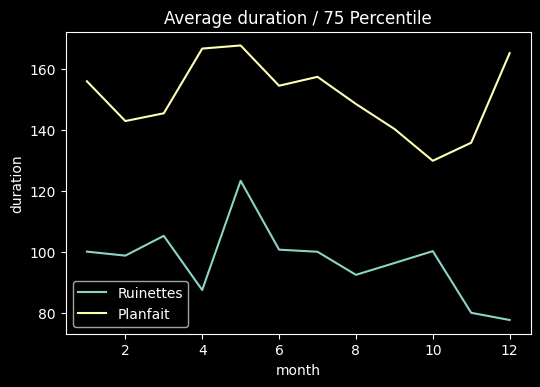

In [342]:
sites = {'Ruinettes': df1, 'Planfait': df2}

percentile = 75

for key, df in sites.items():
    #print(key, df)
    dd = df[df['duration'] > np.percentile(df['duration'], percentile)]
    dd.groupby('month')['duration'].mean().plot(label=key)
    #plt.ylim(0,100)
    plt.ylabel('duration')
    plt.legend()
    plt.title(f'Average duration / {percentile} Percentile')
    

Surprenant, je m'attendais pas à une baisse en ete. A voir.